# Projet Supply Chain - DS23

## 1. Rapport d'exploration, de data visualisation et de pre-processing des données

### 1.1 Collecte des données

In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

#### a) Jeu de données transmis par Datascientest

In [3]:
df_ds=pd.read_csv('reviews_trust.csv')
df_ds.head()

,Commentaire,star,date,client,reponse,source,company,ville,maj,date_commande,ecart
0,"Bonjour , Ca doit faire 5 ans environ que je s...",1,2021-06-20 00:00:00+00:00,AUDREY Du 62,NaN,TrustPilot,ShowRoom,NaN,NaN,NaN,NaN
1,Vente lacoste article manquant photo prise sur...,1,2021-06-20 00:00:00+00:00,Nanasky De Verteuil,NaN,TrustPilot,ShowRoom,NaN,NaN,NaN,NaN
2,"Vente Lacoste Honteuse , article erroné , arti...",1,2021-06-19 00:00:00+00:00,Vanessa L,NaN,TrustPilot,ShowRoom,NaN,NaN,NaN,NaN
3,J'ai commandé des mules de la marque Moosefiel...,2,2021-06-19 00:00:00+00:00,Valery PERRAULT,"Bonjour , Je suis sincèrement navré d'apprendr...",TrustPilot,ShowRoom,NaN,NaN,NaN,NaN
4,Commande téléphone etat A+ . Livraison d un vi...,1,2021-06-19 00:00:00+00:00,JULIE DRINGENBERG,"Bonjour Julie , Je suis sincèrement désolé de ...",TrustPilot,ShowRoom,NaN,NaN,NaN,NaN


#### b) Jeu de données scrappé sur le site Trustpilot - company Uniqlo

In [4]:
from bs4 import BeautifulSoup as bs
import requests

In [70]:
url_uniqlo='https://fr.trustpilot.com/review/www.uniqlo.com'
Commentaire, star, date, client, reponse, maj, date_commande =[], [], [], [], [], [], []


for page_number in range(1, 10): #au delà de la page 10, la boucle ne fonctionne plus car manque balise
    url_uni=f"{url_uniqlo}?page={page_number}"
    page_uni=requests.get(url_uni, verify=False)
    soup_uniqlo=bs(page_uni.content, 'lxml')

    for donnees in soup_uniqlo.find_all('div', attrs = {'class' : "styles_reviewCardInner__EwDq2"}) :
      
        comments=donnees.find('p', class_='typography_body-l__KUYFJ typography_appearance-default__AAY17 typography_color-black__5LYEn').text.strip()
        Commentaire.append(comments) # OK
    
        notes=donnees.find('img')
        star.append(notes['alt']) # OK
    
        for time in soup_uniqlo.select('time'):
            date_com=time.get('datetime')
            date.append(date_com[:10])  # OK
     
        personne=donnees.find('span', class_='typography_heading-xxs__QKBS8 typography_appearance-default__AAY17').text.strip()
        client.append(personne)  # OK
    
        # pas de réponse du service client sur Uniqlo
        # donc pas de maj sur Uniqlo
    
        date_cde=donnees.find('p', class_='typography_body-m__xgxZ_ typography_appearance-default__AAY17').text.strip()
        date_commande.append(date_cde[22:])  # OK
    
    
print(Commentaire)
print(star)
print(date)
print(client)
#print(reponse)
#print(maj)
print(date_commande)    


C:\Users\Administrateur\AppData\Local\Programs\Python\Python311\Lib\site-packages\urllib3\connectionpool.py:1095: InsecureRequestWarning: Unverified HTTPS request is being made to host 'fr.trustpilot.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
C:\Users\Administrateur\AppData\Local\Programs\Python\Python311\Lib\site-packages\urllib3\connectionpool.py:1095: InsecureRequestWarning: Unverified HTTPS request is being made to host 'fr.trustpilot.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
C:\Users\Administrateur\AppData\Local\Programs\Python\Python311\Lib\site-packages\urllib3\connectionpool.py:1095: InsecureRequestWarning: Unverified HTTPS request is being made to host 'fr.trustpilot.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedoc

['Nous sommes allées dans le magasin Uniqlo de Passy et la vendeuse nous a demandé d’aller au magasin Uniqlo de La Défense pour échanger un article.Or sur le ticket , est précisé que les échanges peuvent être fait dans n’importe quel magasin.', "Je recommande fortement, j'ai acheté plusieurs vêtements en lin. Tous excellent. Légèrement cher mais tout de même qualitatif, contrairement aux autres marques de cette gamme.", 'Grand magasin avec énormément de choix la vie de nombreux vendeurs sur quatre étages ainsi que présents en cas de problème sur des vêtements.Vraiment beau magasin !', 'Article jamais reçu, cela fait plus de 15 jours que j\'aurais dû être livré. Le SAV se contente de me répondre que "le colis est supposé livré" et ne propose aucune solution. A fuir absolument', 'Très grand magasin, les vêtements sont très bien rangé et très bien disposé pour afin de faciliter la vue. Les vendeurs sont très professionnels et compréhensif malheureusement il y en a pas beaucoup.Je recomman

In [71]:
import pandas as pd

df_uniqlo = pd.DataFrame(list(zip(Commentaire, star, date, client, date_commande)),
               columns =['Commentaire', 'star', 'date', 'client', 'date_commande'])
# sans colonne 'reponse', 'maj', 'date_commande'

df_uniqlo['source']='TrustPilot'
df_uniqlo['company']='Uniqlo'

display(df_uniqlo.head())

df_uniqlo.info() #est ce possible de ne pas mettre d'étoiles ?

df_uniqlo['star'].value_counts() # 35 sans étoiles ?



,Commentaire,star,date,client,date_commande,source,company
0,Nous sommes allées dans le magasin Uniqlo de P...,Noté 1 sur 5 étoiles,2023-06-29,ELLE,29 juin 2023,TrustPilot,Uniqlo
1,"Je recommande fortement, j'ai acheté plusieurs...",,2023-06-29,Lenny Tridat,22 juin 2023,TrustPilot,Uniqlo
2,Grand magasin avec énormément de choix la vie ...,,2023-06-27,Carolina,27 juin 2023,TrustPilot,Uniqlo
3,"Article jamais reçu, cela fait plus de 15 jour...",Noté 1 sur 5 étoiles,2023-06-21,Antoine,21 juin 2023,TrustPilot,Uniqlo
4,"Très grand magasin, les vêtements sont très bi...",,2023-06-20,Martine,20 juin 2023,TrustPilot,Uniqlo


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Commentaire    180 non-null    object
 1   star           180 non-null    object
 2   date           180 non-null    object
 3   client         180 non-null    object
 4   date_commande  180 non-null    object
 5   source         180 non-null    object
 6   company        180 non-null    object
dtypes: object(7)
memory usage: 10.0+ KB


star
Noté 1 sur 5 étoiles    135
                         35
Noté 3 sur 5 étoiles      3
Noté 4 sur 5 étoiles      3
Noté 2 sur 5 étoiles      3
Noté 5 sur 5 étoiles      1
Name: count, dtype: int64

#### c) Jeu de données scrappé sur le site Trustpilot - company Spartoo.com

In [ ]:
url_zara='https://fr.trustpilot.com/review/www.uniqlo.com'
Commentaire, star, date, client, reponse, maj, date_commande =[], [], [], [], [], [], []


for page_number in range(1, 18):
    url_uni=f"{url_uniqlo}?page={page_number}"
    page_uni=requests.get(url_uni, verify=False)
    soup_uniqlo=bs(page_uni.content, 'lxml')

    for donnees in soup_uniqlo.find_all('div', attrs = {'class' : "styles_reviewCardInner__EwDq2"}) :
      
        comments=donnees.find('p', class_='typography_body-l__KUYFJ typography_appearance-default__AAY17 typography_color-black__5LYEn').text.strip()
        Commentaire.append(comments) # OK
    
        notes=donnees.find('img')
        star.append(notes['alt']) # OK
    
        for time in soup_uniqlo.select('time'):
            date_com=time.get('datetime')
            date.append(date_com[:10])  # OK
     
        personne=donnees.find('span', class_='typography_heading-xxs__QKBS8 typography_appearance-default__AAY17').text.strip()
        client.append(personne)  # OK
    
        # pas de réponse du service client sur Uniqlo
        # donc pas de maj sur Uniqlo
    
        date_cde=donnees.find('p', class_='typography_body-m__xgxZ_ typography_appearance-default__AAY17').text.strip()
        date_commande.append(date_cde[22:])  # OK
    
    
print(Commentaire)
print(star)
print(date)
print(client)
#print(reponse)
#print(maj)
print(date_commande)    


### 1.2 Exploration des données

In [40]:
print(df_ds.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19863 entries, 0 to 19862
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Commentaire    19834 non-null  object 
 1   star           19863 non-null  int64  
 2   date           19488 non-null  object 
 3   client         10215 non-null  object 
 4   reponse        8477 non-null   object 
 5   source         19863 non-null  object 
 6   company        19863 non-null  object 
 7   ville          4860 non-null   object 
 8   maj            5 non-null      object 
 9   date_commande  6686 non-null   object 
 10  ecart          6686 non-null   float64
dtypes: float64(1), int64(1), object(9)
memory usage: 1.7+ MB
None


In [43]:
# Nettoyage du jeu de données

df_ds = df_ds.dropna(axis = 0, how = 'any', subset = ['Commentaire','date']) 


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


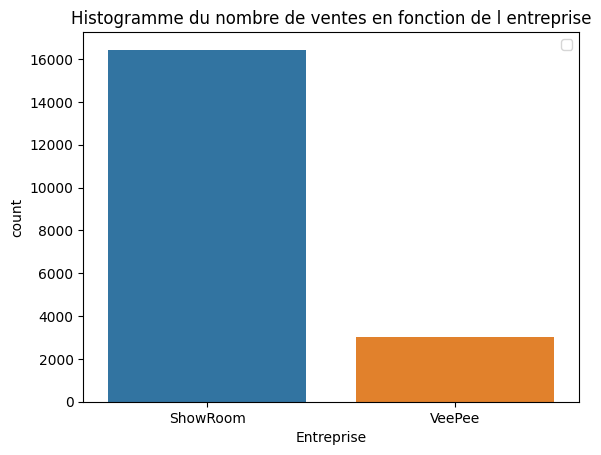

In [44]:
# Analyse de la distribution des données par entreprises

sns.countplot(x="company", data=df_ds);
plt.xlabel('Entreprise')
plt.legend()
plt.title('Histogramme du nombre de ventes en fonction de l entreprise');

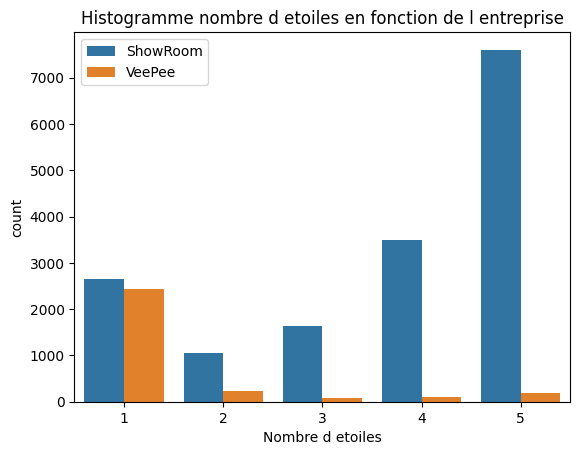

In [45]:
# Analyse de la distribution du nombre d'étoiles par entreprises

sns.countplot(x="star", hue='company', data=df_ds)
plt.xlabel('Nombre d etoiles')
plt.legend()
plt.title('Histogramme nombre d etoiles en fonction de l entreprise');

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


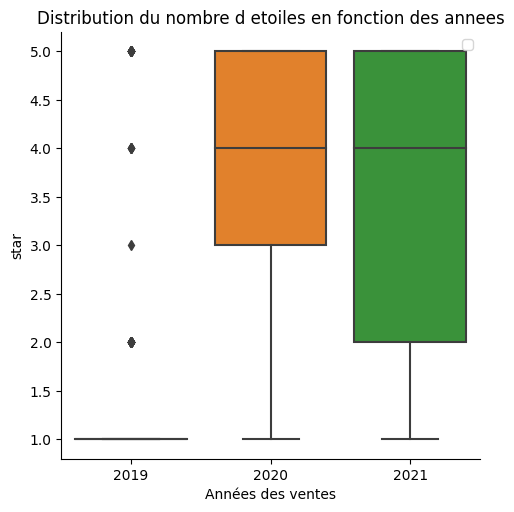

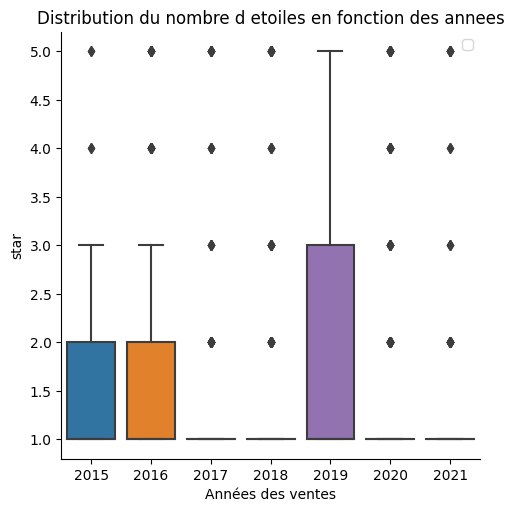

In [59]:
# Analyse de l'évolution du nombre d etoiles en fonction des années

# Création de la variable annee
df_ds["annee"] = df_ds["date"].str[:4].astype(int)

sns.catplot(data=df_ds[df_ds['company'] == 'ShowRoom'], x='annee', y='star', kind='box');
plt.xlabel('Années des ventes')
plt.legend()
plt.title('Distribution du nombre d etoiles en fonction des annees');

sns.catplot(data=df_ds[df_ds['company'] == 'VeePee'], x='annee', y='star', kind='box');
plt.xlabel('Années des ventes')
plt.legend()
plt.title('Distribution du nombre d etoiles en fonction des annees');

### 1.3 Exploitation des données